In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [57]:
df = pd.read_csv('clustering_data.csv')
df

C:\Users\jaina\AppData\Local\Temp\ipykernel_20200\1165983512.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clustering_data.csv')


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
...,...,...,...,...,...,...,...,...,...,...,...
157121,Uttar Pradesh Circle,Bareilly Region,Meerut Division,Rly Road Meerut SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.98,77.68
157122,Uttar Pradesh Circle,Bareilly Region,Meerut Division,SGMandi SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.9724,77.67536
157123,Uttar Pradesh Circle,Bareilly Region,Meerut Division,W K Road SO,250001,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.99,77.71
157124,Kerala Circle,Calicut Region,Calicut Division,Kakkoti SO,673611,PO,Delivery,KOZHIKODE,KERALA,11.24529,75.778455


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CircleName    157126 non-null  object
 1   RegionName    157073 non-null  object
 2   DivisionName  157124 non-null  object
 3   OfficeName    157126 non-null  object
 4   Pincode       157126 non-null  int64 
 5   OfficeType    157126 non-null  object
 6   Delivery      157126 non-null  object
 7   District      157126 non-null  object
 8   StateName     157126 non-null  object
 9   Latitude      148288 non-null  object
 10  Longitude     148283 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.2+ MB


In [59]:
df.describe()

,Pincode
count,157126.000000
mean,503210.912338
std,207601.451534
min,110001.000000
25%,332602.000000
50%,504251.000000
75%,685609.000000
max,999999.000000


In [60]:
df_home = df[df['StateName'] == "HARYANA"]
df_home

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
12647,Haryana Circle,DivReportingCircle,Karnal Division,Baniya Khera B.O,126110,BO,Delivery,JIND,HARYANA,29.45,25.3
12648,Haryana Circle,DivReportingCircle,Karnal Division,Lajwan Kalan B.O,126101,BO,Delivery,JIND,HARYANA,29.3,25.3
12649,Haryana Circle,DivReportingCircle,Karnal Division,Malwi B.O,126101,BO,Delivery,JIND,HARYANA,29.3,25.3
12650,Haryana Circle,DivReportingCircle,Karnal Division,Mandi Kalan B.O,126125,BO,Delivery,JIND,HARYANA,29.45,36.3
12651,Haryana Circle,DivReportingCircle,Karnal Division,Sandil B.O,126125,BO,Delivery,JIND,HARYANA,33.3,25.3
...,...,...,...,...,...,...,...,...,...,...,...
141084,Haryana Circle,DivReportingCircle,Sonepat Division,Nahri SO,131103,PO,Delivery,SONIPAT,HARYANA,28.855667,77.0456667
141085,Haryana Circle,DivReportingCircle,Sonepat Division,Sonipat Kty SO,131001,PO,Non Delivery,SONIPAT,HARYANA,29.000139,77.0001389
141097,Haryana Circle,DivReportingCircle,Sonepat Division,Juan SO,131024,PO,Delivery,SONIPAT,HARYANA,28.933028,76.9749722
141098,Haryana Circle,DivReportingCircle,Sonepat Division,Purkhas SO,131102,PO,Delivery,SONIPAT,HARYANA,29.110139,76.9445278


In [61]:
df_home.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2702 entries, 12647 to 142305
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CircleName    2702 non-null   object
 1   RegionName    2702 non-null   object
 2   DivisionName  2702 non-null   object
 3   OfficeName    2702 non-null   object
 4   Pincode       2702 non-null   int64 
 5   OfficeType    2702 non-null   object
 6   Delivery      2702 non-null   object
 7   District      2702 non-null   object
 8   StateName     2702 non-null   object
 9   Latitude      2685 non-null   object
 10  Longitude     2687 non-null   object
dtypes: int64(1), object(10)
memory usage: 253.3+ KB


In [62]:
df_home.describe()

,Pincode
count,2702.000000
mean,127766.480015
std,4704.292356
min,121001.000000
25%,124112.000000
50%,126102.000000
75%,132104.000000
max,136156.000000


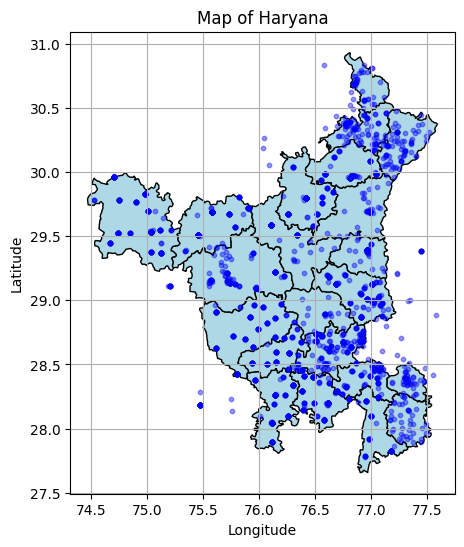

In [67]:
# Ensure 'Longitude' and 'Latitude' are numeric and drop rows with missing values
df_home['Longitude'] = pd.to_numeric(df_home['Longitude'], errors='coerce')
df_home['Latitude'] = pd.to_numeric(df_home['Latitude'], errors='coerce')
df_home = df_home.dropna(subset=['Longitude', 'Latitude'])

# Convert df_home to a GeoDataFrame
geometry = gpd.points_from_xy(df_home['Longitude'], df_home['Latitude'])
gdf_home = gpd.GeoDataFrame(df_home, geometry=geometry, crs="EPSG:4326")

# Convert df_home to a GeoDataFrame
geometry = gpd.points_from_xy(df_home['Longitude'], df_home['Latitude'])
gdf_home = gpd.GeoDataFrame(df_home, geometry=geometry, crs="EPSG:4326")

# Load the GeoJSON file
haryana = gpd.read_file('Haryana.geojson')

# Get the bounding box of Haryana
bbox = haryana.total_bounds  # returns [minx, miny, maxx, maxy]

# Filter points within the bounding box
df_home = df_home[(df_home['Longitude'] >= bbox[0]) & (df_home['Longitude'] <= bbox[2]) & 
                  (df_home['Latitude'] >= bbox[1]) & (df_home['Latitude'] <= bbox[3])]

# Plotting only the Haryana map
fig, ax = plt.subplots(figsize=(10, 6))

# Plot state boundary
haryana.plot(ax=ax, color='lightblue', edgecolor='black')

ax.scatter(df_home['Longitude'], df_home['Latitude'], c='blue', marker='o', s=10, alpha=0.4)

ax.set_title('Map of Haryana')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

plt.show()

In [75]:
# Function to implement k-means clustering
def kmeans(data, k, max_iters=100):
    # Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Recalculate the centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Convert longitude and latitude to numpy array
data = df_home[['Longitude', 'Latitude']].values


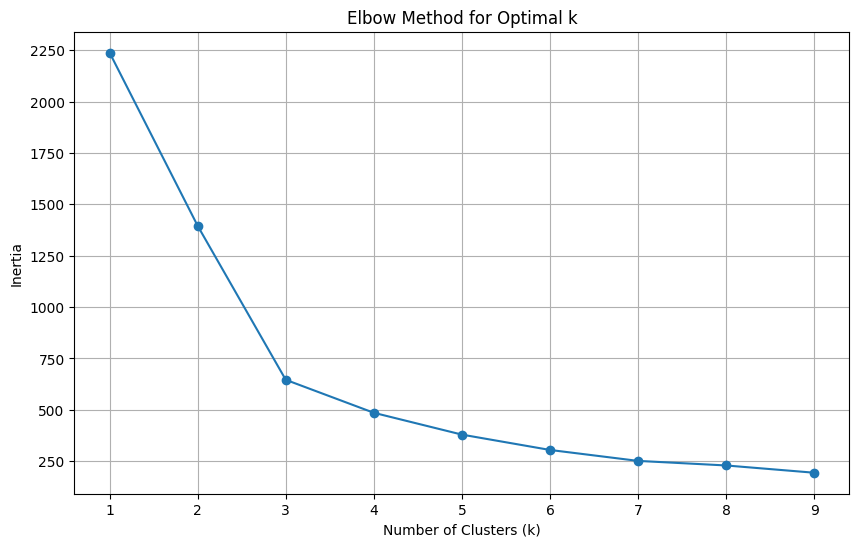

In [87]:
# Function to calculate inertia (sum of squared distances)
def inertia(data, centroids, labels):
    return np.sum((data - centroids[labels])**2)

# Range of k values to test
k_values = range(1, 10)
inertia_values = []

# Calculate inertia for each k
for k in k_values:
    centroids, labels = kmeans(data, k)
    inertia_values.append(inertia(data, centroids, labels))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

- On Closely Observing the curve above we see that at k = 3 we obtained the elbow indicating a value of k that indicated a balance between minimizing inertia (so a better fit for data) and not overfitting.

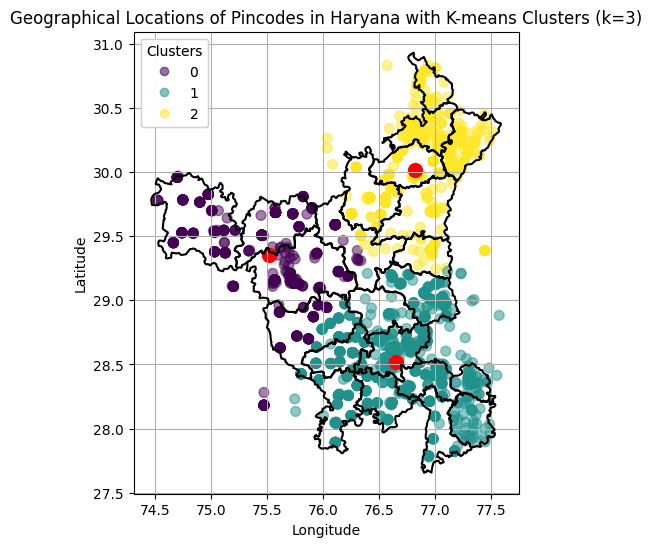

In [89]:
k = 3

centroids, labels = kmeans(data, k)

# Convert centroids and labels back to DataFrame for plotting
centroids_df = pd.DataFrame(centroids, columns=['Longitude', 'Latitude'])
df_home['Cluster'] = labels

# Plotting clusters on the map
fig, ax = plt.subplots(figsize=(10, 6))

# Plot state boundary
haryana.boundary.plot(ax=ax, color='black')

# Plot points with cluster labels
scatter = ax.scatter(df_home['Longitude'], df_home['Latitude'], c=df_home['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.5)

# Plot centroids
ax.scatter(centroids_df['Longitude'], centroids_df['Latitude'], c='red', marker='o', s=100, label='Centroids')

ax.set_title('Geographical Locations of Pincodes in Haryana with K-means Clusters (k=3)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

### Insights from Clustering Analysis of Pincodes in Haryana

1. **Spatial Distribution Insight:**
   - The symmetric clustering pattern suggests that the geographical distribution of pincodes in Haryana exhibits a balanced spatial arrangement across the state.
   - Each cluster forms around centroids in a symmetrical manner, indicating even distribution of pincodes around central points.

2. **Population or Economic Centers:**
   - Clusters forming around centroids may represent significant population centers or economic hubs within Haryana.
   - Centroids likely correspond to urban areas or regions with higher population density, economic activity, or infrastructure development.

3. **Regional Balance and Development:**
   - Symmetric clustering implies balanced regional development or planning across different parts of Haryana.
   - This suggests equitable distribution of resources, infrastructure, or economic opportunities among various geographical areas.
